## Check Installation & Import Modules

In [1]:
from osgeo import gdal
print("Using gdal version", gdal.__version__)

Using gdal version 3.7.0


In [2]:
import pywapor
print("Using pywapor version:", pywapor.__version__)

/Users/micky/anaconda3/envs/test_pywapor/lib/python3.11/site-packages/pywapor/enhancers/smooth/core.py:21: NumbaExperimentalFeatureWarning: Use of isinstance() detected. This is an experimental feature.
  v = np.where(Y > Z, a_, 1 - a_)
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/micky/anaconda3/envs/test_pywapor/lib/python3.11/site-packages/pywapor/enhancers/smooth/core.py:128: NumbaExperimentalFeatureWarning: Use of isinstance() detected. This is an experimental feature.
  Y_ = np.where(w == 0, 0, Y)


Using pywapor version: 3.3.5


In [3]:
%matplotlib inline
import xarray as xr
print("Using xarray version:", xr.__version__)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rioxarray

Using xarray version: 2023.5.0


In [4]:
from functools import partial
import pywapor.se_root as se_root

In [5]:
import glob
import os

## Default ETLook Input

### Basic Configuration **(Needs NASA Earthdata Login Details)**

In [ ]:
pywapor.collect.accounts.setup("NASA")

In [7]:
# User inputs
# Specify data input and output folders

# The default ETLook project output folder
default_project_folder = r"/Users/micky/PycharmProjects/hackathon_pywapor/data_default_pywapor_1"

# The folder containing daily maximum temperature
temp_max_folder = r"/Users/micky/PycharmProjects/hackathon_pywapor/data_custom/temp_max"

# The folder for all netCDF created outputs
# TODO: Check if we need to store xr.Dataset as a.nc file
data_custom_netcdf_folder = r"/Users/micky/PycharmProjects/hackathon_pywapor/data_custom_netcdf"

# The custom side loading method 1 output folder
sl_1_project_folder = r"/Users/micky/PycharmProjects/hackathon_pywapor/data_custom_SL_1"

# Time period: default composite length of pyWAPOR 10 days
timelim = ["2023-01-01", "2023-01-11"]
# Note: composites are also referred to as time_bins
composite_length = "DEKAD"

# Default data source
level = "level_1"
sources = pywapor.general.levels.pre_et_look_levels(level)

# Bounding box of AOI
# TODO: this must be updated
latlim = [-34.1, -33.3] # first value refers to the southern border
lonlim = [18.7, 19.4] # first value refers to the western border

# Input Data Coordinate Reference System
project_crs = "EPSG:4326"

In [ ]:
# Download and prepare input data
ds  = pywapor.pre_et_look.main(default_project_folder, latlim, lonlim, timelim, bin_length=composite_length)

In [ ]:
# To see the file the dataset is stored in
fh = ds.encoding["source"]
print(fh)

In [8]:
fh = os.path.join(default_project_folder, "et_look_in.nc")

In [9]:
# To import the file the dataset is stored in (et_look_in.nc) (if you don't want to run pre_et_look again)
# The decode_coords keyword is used to make sure CRS info is loaded correctly.
ds = xr.open_dataset(fh, decode_coords = "all")

In [10]:
# Take a closer look at the contents of the datasets
# This variable contains a xarray.Dataset which is a Python-package that let's you work with large multi-dimensional datasets.
ds

<xarray.Dataset>
Dimensions:              (x: 275, y: 314, time_bins: 1)
Coordinates:
  * x                    (x) float64 18.7 18.7 18.71 18.71 ... 19.39 19.4 19.4
  * y                    (y) float64 -33.3 -33.3 -33.31 ... -34.09 -34.1 -34.1
    spatial_ref          int64 ...
  * time_bins            (time_bins) datetime64[ns] 2023-01-01
Data variables: (12/78)
    ndvi                 (time_bins, y, x) float64 ...
    r0                   (time_bins, y, x) float64 ...
    se_root              (time_bins, y, x) float64 ...
    p_24                 (time_bins, y, x) float64 ...
    z                    (y, x) float64 ...
    ra_24                (time_bins, y, x) float64 ...
    ...                   ...
    o2                   float64 ...
    co2_ref              int64 ...
    gcgdm                float64 ...
    phot_eff             float64 ...
    r0_bare              float64 ...
    r0_full              float64 ...

In [11]:
# Access the coordinate reference system and boundaries
print("DS CRS: ",ds.rio.crs)
print("DS Bounds: ",ds.rio.bounds())
print("DS Resolution: ",ds.rio.resolution())

DS CRS:  EPSG:4326
DS Bounds:  (18.699677777270434, -34.100854506988604, 19.400150808833494, -33.30104166367659)
DS Resolution:  (0.00254717466022931, -0.0025471746602293136)


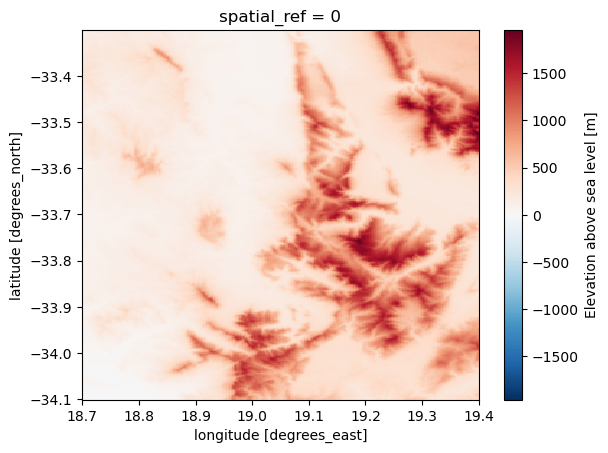

In [12]:
# XArray datasets are also easy to plot and smart enough to automatically fill in the units and the description of the variable.
ds.z.plot()

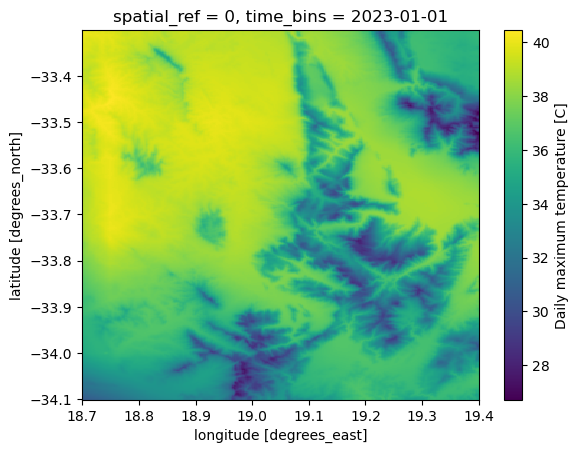

In [13]:
# Make a map of a 3-dimensional variable, we will have to select for which time.
ds.t_air_max_24.isel(time_bins = 0).plot()


## Running Default ETLook

In [14]:
ds_out = pywapor.et_look.main(ds)

> ET_LOOK
    --> Running `et_look` (v2).
    --> Calculating `declination`.
    --> Calculating `inverse_earth_sun_distance`.
    --> Calculating `vegetation_cover`.
    --> Calculating `leaf_area_index`.
    --> Calculating `effective_leaf_area_index`.
    --> Calculating `soil_fraction`.
    --> Calculating `latitude_rad`.
    --> Calculating `sunset_hour_angle`.
    --> Calculating `daily_solar_radiation_toa_flat`.
    --> Calculating `transmissivity`.
    --> Calculating `stress_radiation`.
    --> Calculating `air_pressure_kpa2mbar`.
    --> Calculating `air_pressure_daily`.
    --> Calculating `air_pressure`.
    --> Calculating `vapour_pressure_from_specific_humidity_daily`.
    --> Calculating `vapour_pressure_from_specific_humidity`.
    --> Calculating `saturated_vapour_pressure`.
    --> Calculating `vapour_pressure_deficit_daily`.
    --> Calculating `vapour_pressure_deficit`.
    --> Calculating `stress_vpd`.
    --> Calculating `stress_temperature`.
    --> Calculating `

In [15]:
# Check the contents of the new dataset
ds_out

<xarray.Dataset>
Dimensions:       (time_bins: 1, y: 314, x: 275)
Coordinates:
  * x             (x) float64 18.7 18.7 18.71 18.71 ... 19.39 19.39 19.4 19.4
  * y             (y) float64 -33.3 -33.3 -33.31 -33.31 ... -34.09 -34.1 -34.1
    spatial_ref   int64 ...
  * time_bins     (time_bins) datetime64[ns] 2023-01-01
Data variables:
    int_mm        (time_bins, y, x) float64 dask.array<chunksize=(1, 314, 275), meta=np.ndarray>
    t_24_mm       (time_bins, y, x) float64 dask.array<chunksize=(1, 314, 275), meta=np.ndarray>
    e_24_mm       (time_bins, y, x) float64 dask.array<chunksize=(1, 314, 275), meta=np.ndarray>
    et_24_mm      (time_bins, y, x) float64 dask.array<chunksize=(1, 314, 275), meta=np.ndarray>
    et_ref_24_mm  (time_bins, y, x) float64 dask.array<chunksize=(1, 314, 275), meta=np.ndarray>
    se_root       (time_bins, y, x) float64 dask.array<chunksize=(1, 314, 275), meta=np.ndarray>
    npp           (time_bins, y, x) float64 dask.array<chunksize=(1, 314, 275), meta=np.ndarray>

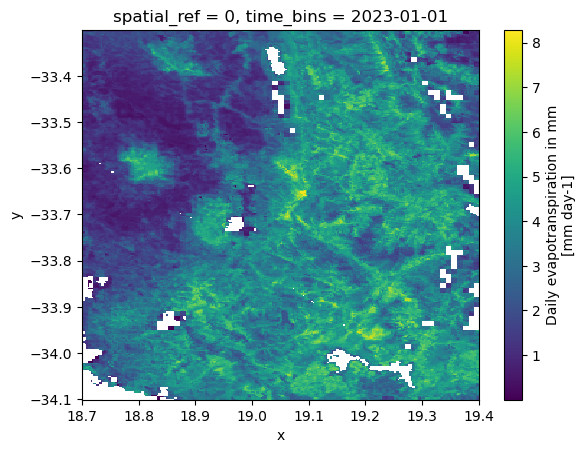

In [16]:
# Plot the daily evapotranspiration in mm
ds_out.et_24_mm.isel(time_bins = 0).plot()

In [17]:
# Note these calculations loads the array into working memory
et_data = ds_out.et_24_mm.isel(time_bins = 0).values
print("resolution:", et_data.shape)
print("total pixels:", et_data.size)
print("number of pixels with missing data:", np.sum(np.isnan(et_data)))
print("maximum value: {0:.2f}".format(np.nanmax(et_data)))
print("minimum value: {0:.2f}".format(np.nanmin(et_data)))
print("mean: {0:.2f}".format(np.nanmean(et_data)))
print("median: {0:.2f}".format(np.nanmedian(et_data)))

resolution: (314, 275)
total pixels: 86350
number of pixels with missing data: 2854
maximum value: 8.28
minimum value: 0.00
mean: 3.27
median: 3.42


## TEST SIDELOADING METHOD 1
Instead of passing a string to the sources input parameters of `pywapor.pre_et_look.main` we can also pass a dictionary that specifies which products we would like to use.

### Loading multiple GeoTIFF files into a single xarray.Dataset

Help from: https://docs.dea.ga.gov.au/notebooks/How_to_guides/Opening_GeoTIFFs_NetCDFs.html

Citation:
Krause, C., Dunn, B., Bishop-Taylor, R., Adams, C., Burton, C., Alger, M., Chua, S., Phillips, C., Newey, V., Kouzoubov,
K., Leith, A., Ayers, D., Hicks, A., DEA Notebooks contributors 2021. Digital Earth Australia notebooks and tools 
repository. Geoscience Australia, Canberra. https://doi.org/10.26186/145234

In [18]:
temp_max_geotiff_list = glob.glob(os.path.join(temp_max_folder, "*.tif"))
print('# of files', len(temp_max_geotiff_list))
temp_max_geotiff_list

# of files 31


['/Users/micky/PycharmProjects/hackathon_pywapor/data_custom/temp_max/2023-01-20_40m_k30.tif',
 '/Users/micky/PycharmProjects/hackathon_pywapor/data_custom/temp_max/2023-01-12_40m_k30.tif',
 '/Users/micky/PycharmProjects/hackathon_pywapor/data_custom/temp_max/2023-01-29_40m_k30.tif',
 '/Users/micky/PycharmProjects/hackathon_pywapor/data_custom/temp_max/2023-01-07_40m_k30.tif',
 '/Users/micky/PycharmProjects/hackathon_pywapor/data_custom/temp_max/2023-01-02_40m_k30.tif',
 '/Users/micky/PycharmProjects/hackathon_pywapor/data_custom/temp_max/2023-01-30_40m_k30.tif',
 '/Users/micky/PycharmProjects/hackathon_pywapor/data_custom/temp_max/2023-01-25_40m_k30.tif',
 '/Users/micky/PycharmProjects/hackathon_pywapor/data_custom/temp_max/2023-01-17_40m_k30.tif',
 '/Users/micky/PycharmProjects/hackathon_pywapor/data_custom/temp_max/2023-01-14_40m_k30.tif',
 '/Users/micky/PycharmProjects/hackathon_pywapor/data_custom/temp_max/2023-01-26_40m_k30.tif',
 '/Users/micky/PycharmProjects/hackathon_pywapor/d

In [19]:
string_slice=(0,10) # extract characters from position 0 to 9
date_strings = [os.path.basename(i)[slice(*string_slice)] for i in temp_max_geotiff_list]
datetime = pd.to_datetime(date_strings)

# Create variable used for time axis
time_var = xr.Variable('time', datetime)

# Load in and concatenate all individual GeoTIFFs
temp_max_geotiffs_da = xr.concat([rioxarray.open_rasterio(i) for i in temp_max_geotiff_list], dim=time_var)

# Convert our xarray.DataArray into a xarray.Dataset
temp_max_geotiffs_ds = temp_max_geotiffs_da.to_dataset('band')

# Rename the variable to a more useful name
temp_max_geotiffs_ds = temp_max_geotiffs_ds.rename({1: 't_air_max'})

temp_max_geotiffs_ds

<xarray.Dataset>
Dimensions:      (time: 31, y: 8338, x: 7265)
Coordinates:
  * x            (x) float64 17.84 17.84 17.85 17.85 ... 20.75 20.75 20.75 20.75
  * y            (y) float64 -31.5 -31.5 -31.5 -31.5 ... -34.83 -34.83 -34.83
    spatial_ref  int64 0
  * time         (time) datetime64[ns] 2023-01-20 2023-01-12 ... 2023-01-15
Data variables:
    t_air_max    (time, y, x) float32 -9.999e+03 -9.999e+03 ... -9.999e+03
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -9999.0
    scale_factor:   1.0
    add_offset:     0.0

In [20]:
# Sort the time variable and select the required date range
temp_max_geotiffs_ds_sorted = temp_max_geotiffs_ds.sortby('time')
temp_max_geotiffs_ds_sorted_timelim = temp_max_geotiffs_ds_sorted.sel(time=slice(timelim[0], timelim[1]))

In [21]:
temp_max_geotiffs_ds_sorted_timelim

<xarray.Dataset>
Dimensions:      (time: 11, y: 8338, x: 7265)
Coordinates:
  * x            (x) float64 17.84 17.84 17.85 17.85 ... 20.75 20.75 20.75 20.75
  * y            (y) float64 -31.5 -31.5 -31.5 -31.5 ... -34.83 -34.83 -34.83
    spatial_ref  int64 0
  * time         (time) datetime64[ns] 2023-01-01 2023-01-02 ... 2023-01-11
Data variables:
    t_air_max    (time, y, x) float32 -9.999e+03 -9.999e+03 ... -9.999e+03
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -9999.0
    scale_factor:   1.0
    add_offset:     0.0

In [22]:
# Clip to the bounding box
temp_max_geotiffs_ds_sorted_timelim_clip = temp_max_geotiffs_ds_sorted_timelim.rio.clip_box(
    minx= lonlim[0],
    miny= latlim[0],
    maxx= lonlim[1],
    maxy= latlim[1],
    crs=project_crs,
)

# Mask out NoData values
# TODO: Should these rather be filled and not masked? 
temp_max_geotiffs_ds_sorted_timelim_clip_masked = temp_max_geotiffs_ds_sorted_timelim_clip.where(temp_max_geotiffs_ds_sorted_timelim_clip['t_air_max'] != -9999.)

# Reproject to match default pre_et_look output
temp_max_geotiffs_ds_sorted_timelim_clip_masked_project = temp_max_geotiffs_ds_sorted_timelim_clip_masked.rio.reproject_match(ds)

In [23]:
temp_max_geotiffs_ds_sorted_timelim_clip_masked_project

<xarray.Dataset>
Dimensions:      (x: 275, y: 314, time: 11)
Coordinates:
  * x            (x) float64 18.7 18.7 18.71 18.71 ... 19.39 19.39 19.4 19.4
  * y            (y) float64 -33.3 -33.3 -33.31 -33.31 ... -34.09 -34.1 -34.1
  * time         (time) datetime64[ns] 2023-01-01 2023-01-02 ... 2023-01-11
    spatial_ref  int64 0
Data variables:
    t_air_max    (time, y, x) float32 39.73 39.76 39.78 ... 29.04 28.87 28.69
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -9999.0
    scale_factor:   1.0
    add_offset:     0.0

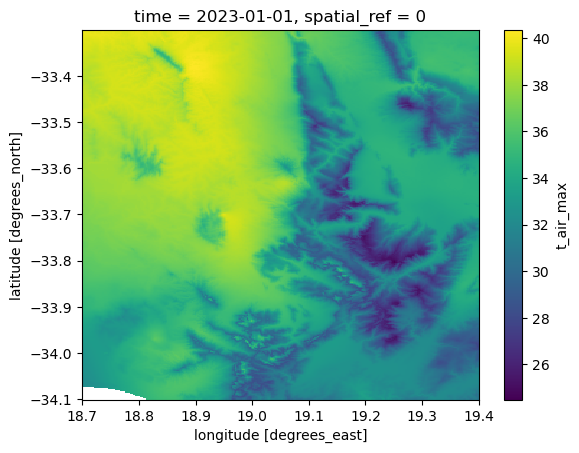

In [24]:
temp_max_geotiffs_ds_sorted_timelim_clip_masked_project.t_air_max.isel(time = 0).plot()

In [25]:
t_air_max_file = os.path.join(data_custom_netcdf_folder, "t_air_max.nc")
# TODO: check if it is okay to use this function (not on the pywapor doc api)
t_air_max_netcdf = pywapor.general.processing_functions.save_ds(
    temp_max_geotiffs_ds_sorted_timelim_clip_masked_project, 
    t_air_max_file, 
    encoding="initiate", 
    label="Testing: t_air_max")

--> Testing: t_air_max
    > peak-memory-usage: 10.9MB, execution-time: 0:00:02.406308.
    > chunksize|dimsize: [time: 11|11, y: 314|314, x: 275|275]


### SIDELOADING METHOD 1

In [26]:
# Start by loading a defualt configuration for pre_et_look and pre_se_root
et_look_config = pywapor.general.levels.pre_et_look_levels(level = "level_1")
se_root_config = pywapor.general.levels.pre_se_root_levels(level = "level_1")

In [27]:
# Create a list of variables
meteo_vars = ['t_air_max']

In [28]:
# Check the default product source and functions
et_look_config['t_air_max']

{'products': [{'source': 'GEOS5',
   'product_name': 'inst3_2d_asm_Nx',
   'enhancers': 'default'}],
 'composite_type': 'max',
 'temporal_interp': 'linear',
 'spatial_interp': 'bilinear'}

In [29]:
# The default enhancers for a specific product can be accessed like this
# TODO: identify if custom products need to keep the enhancers
pywapor.collect.product.GEOS5.default_post_processors('inst3_2d_asm_Nx', 't_air_max')

{'t_air': [<function pywapor.enhancers.temperature.kelvin_to_celsius(ds, var, in_var=None, out_var=None)>],
 't_air_max': [functools.partial(<function kelvin_to_celsius at 0x13ef3e160>, in_var='t_air', out_var='t_air_max')]}

* For each variable we need to adjust the "products" part.
* Overwrite the list under the "products" key.
* Note: the value of "source" needs to be a function that returns a xr.Dataset which contains a variable called 't_air_max'
* For the product name we can choose a new name!

Older version doc of sideloading: https://www.fao.org/aquastat/py-wapor/notebooks/4_sideloading.html#Sideloading (before se_root model???)

The sideloading function might need to meet certain criteria.
A template function looks like this:

In [30]:
# TODO: Change custom sideload with more specific parameters
def my_custom_source(folder, latlim, lonlim, timelim, product_name, req_vars, post_processors):
    ...
    # within thie function you can add whatever process you want to execute
    # it must return an xr.Dataset that contains at least the variable for which it is specified in source
    custom_ds = xr.Dataset()
    return ds

In [31]:
# Step 1: Define a function that can return the dataset
# Note the **kwargs is added to discard the other arguments that are not used in this (very simple) function.
def meteo_sideload(**kwargs):
    meteo_netcdf_file = os.path.join(data_custom_netcdf_folder,"t_air_max.nc")
    meteo_ds = xr.open_dataset(meteo_netcdf_file)
    return meteo_ds

In [32]:
# Step 2: Put it inside the configuration for each variable.
meteo_config = [{"source": meteo_sideload, "product_name": "METEO_PROVIDED", "enhancers": []}]
for var in meteo_vars:
    et_look_config[var]["products"] = meteo_config
    se_root_config[var]["products"] = meteo_config

In [33]:
# Now the configuration contains our new product
et_look_config['t_air_max']

{'products': [{'source': <function __main__.meteo_sideload(**kwargs)>,
   'product_name': 'METEO_PROVIDED',
   'enhancers': []}],
 'composite_type': 'max',
 'temporal_interp': 'linear',
 'spatial_interp': 'bilinear'}

Right now the configuration for `"se_root"` inside `et_look_config` still contains the original `level_1` configuration

In [34]:
et_look_config["se_root"]

{'products': [{'source': functools.partial(<function se_root at 0x17a15b9c0>, bin_length=1, sources='level_1'),
   'product_name': 'v2',
   'enhancers': 'default'}],
 'composite_type': 'max',
 'temporal_interp': None,
 'spatial_interp': 'bilinear'}

In [35]:
# We can adjust it like this: pass the adjusted se_root_config to et_look_config
se_root_dler = partial(se_root.se_root, sources = se_root_config)
et_look_config["se_root"]["products"][0]["source"] = se_root_dler

In [36]:
# Now the configuration for "se_root" has been updated too
et_look_config["se_root"]

{'products': [{'source': functools.partial(<function se_root at 0x17a15b9c0>, sources={'ndvi': {'products': [{'source': 'MODIS', 'product_name': 'MOD13Q1.061', 'enhancers': 'default', 'is_example': True}, {'source': 'MODIS', 'product_name': 'MYD13Q1.061', 'enhancers': 'default'}], 'temporal_interp': 'linear', 'spatial_interp': 'nearest'}, 'lst': {'products': [{'source': 'MODIS', 'product_name': 'MOD11A1.061', 'enhancers': 'default'}, {'source': 'MODIS', 'product_name': 'MYD11A1.061', 'enhancers': 'default'}], 'temporal_interp': None, 'spatial_interp': 'nearest'}, 't_air': {'products': [{'source': 'GEOS5', 'product_name': 'inst3_2d_asm_Nx', 'enhancers': 'default'}], 'temporal_interp': 'linear', 'spatial_interp': 'bilinear'}, 't_air_max': {'products': [{'source': <function meteo_sideload at 0x17fb12f20>, 'product_name': 'METEO_PROVIDED', 'enhancers': []}], 'temporal_interp': 'linear', 'spatial_interp': 'bilinear'}, 't_air_min': {'products': [{'source': 'GEOS5', 'product_name': 'inst3_2d_

#### Custom ETLook Input

In [37]:
# Finally we can start pre_et_look as usual
custom_input_ds = pywapor.pre_et_look.main(sl_1_project_folder, latlim, lonlim, timelim, bin_length=composite_length, sources = et_look_config)

> PRE_ET_LOOK
    --> Collecting `ndvi` from `MODIS.MOD13Q1.061`.
            > timesize: 3 [2023-01-09T00:00, ..., 2023-02-10T00:00]
    --> Collecting `ndvi` from `MODIS.MYD13Q1.061`.
            > timesize: 3 [2023-01-04T00:00, ..., 2023-02-02T00:00]
    --> Collecting `r0` from `MODIS.MCD43A3.061`.
            > timesize: 38 [2022-12-29T12:00, ..., 2023-02-04T12:00]
    --> Collecting `p` from `CHIRPS.P05`.
            > timesize: 38 [2022-12-29T00:30, ..., 2023-02-04T00:30]
    --> Collecting `z` from `SRTM.30M`.
            > timesize: 1 [2000-02-11T00:00, ..., 2000-02-11T00:00]
    --> Collecting `ra` from `MERRA2.M2T1NXRAD.5.12.4`.
            > timesize: 912 [2022-12-29T01:00, ..., 2023-02-05T00:00]
    --> Collecting `t_air`, `t_air_min`, `u2m`, `v2m`, `qv`, `p_air`, `p_air_0`, `wv` from `GEOS5.inst3_2d_asm_Nx`.
        --> Downloading data.
            > peak-memory-usage: 1.4MB, execution-time: 0:00:48.287591.
            > chunksize|dimsize: [time: 129|129, y: 5|5, x: 5|5]

                    > peak-memory-usage: 2.6MB, execution-time: 0:00:02.071501.
                    > chunksize|dimsize: [y: 314|314, x: 275|275]
            --> Selected `reproject_chunk` for reprojection of WaPOR2.nc.
                --> Correcting src_ds.
                    > peak-memory-usage: 4.4MB, execution-time: 0:00:02.091347.
                    > chunksize|dimsize: [y: 403|403, x: 358|358]
                --> Warping VRT to netCDF.
                    > peak-memory-usage: 5.8KB, execution-time: 0:00:00.030771.
                --> Saving reprojected data from WaPOR2_fixed.nc:r0_full (bilinear).
                    > peak-memory-usage: 2.6MB, execution-time: 0:00:02.081213.
                    > chunksize|dimsize: [y: 314|314, x: 275|275]
            --> Selected `reproject_chunk` for reprojection of t_air_i.nc.
                --> Warping VRT to netCDF.
                    > peak-memory-usage: 10.1KB, execution-time: 0:00:00.862832.
                --> Saving reprojected dat

            --> Saving `p` composites.
                > peak-memory-usage: 288.1KB, execution-time: 0:00:02.068524.
                > chunksize|dimsize: [time_bins: 1|1, y: 18|18, x: 16|16]
        --> (5/26) Compositing `z` (None).
            --> Saving `z` composites.
                > peak-memory-usage: 221.9MB, execution-time: 0:00:02.382787.
                > chunksize|dimsize: [y: 2883|2883, x: 2522|2522]
        --> (6/26) Compositing `ra` (mean).
            --> Saving `ra` composites.
                > peak-memory-usage: 377.9KB, execution-time: 0:00:02.074642.
                > chunksize|dimsize: [time_bins: 1|1, y: 4|4, x: 4|4]
        --> (7/26) Compositing `t_air` (mean).
            --> Saving `t_air` composites.
                > peak-memory-usage: 92.4KB, execution-time: 0:00:02.080178.
                > chunksize|dimsize: [time_bins: 1|1, y: 5|5, x: 5|5]
        --> (8/26) Compositing `t_air_max` (max).
            --> Saving `t_air_max` composites.
                >

    --> Selected `reproject_chunk` for reprojection of v2m_bin.nc.
        --> Warping VRT to netCDF.
            > peak-memory-usage: 5.6KB, execution-time: 0:00:00.018604.
        --> Saving reprojected data from v2m_bin.nc:v2m (bilinear).
            > peak-memory-usage: 2.6MB, execution-time: 0:00:02.079533.
            > chunksize|dimsize: [time_bins: 1|1, y: 314|314, x: 275|275]
    --> Selected `reproject_chunk` for reprojection of qv_bin.nc.
        --> Warping VRT to netCDF.
            > peak-memory-usage: 5.6KB, execution-time: 0:00:00.018830.
        --> Saving reprojected data from qv_bin.nc:qv (bilinear).
            > peak-memory-usage: 2.6MB, execution-time: 0:00:02.088602.
            > chunksize|dimsize: [time_bins: 1|1, y: 314|314, x: 275|275]
    --> Selected `reproject_chunk` for reprojection of p_air_bin.nc.
        --> Warping VRT to netCDF.
            > peak-memory-usage: 5.6KB, execution-time: 0:00:00.018498.
        --> Saving reprojected data from p_air_bin.

In [38]:
custom_input_ds

<xarray.Dataset>
Dimensions:              (x: 275, y: 314, time_bins: 1)
Coordinates:
  * x                    (x) float64 18.7 18.7 18.71 18.71 ... 19.39 19.4 19.4
  * y                    (y) float64 -33.3 -33.3 -33.31 ... -34.09 -34.1 -34.1
    spatial_ref          int64 ...
  * time_bins            (time_bins) datetime64[ns] 2023-01-01
Data variables: (12/78)
    ndvi                 (time_bins, y, x) float64 dask.array<chunksize=(1, 314, 275), meta=np.ndarray>
    r0                   (time_bins, y, x) float64 dask.array<chunksize=(1, 314, 275), meta=np.ndarray>
    se_root              (time_bins, y, x) float64 dask.array<chunksize=(1, 314, 275), meta=np.ndarray>
    p_24                 (time_bins, y, x) float64 dask.array<chunksize=(1, 314, 275), meta=np.ndarray>
    z                    (y, x) float64 dask.array<chunksize=(314, 275), meta=np.ndarray>
    ra_24                (time_bins, y, x) float64 dask.array<chunksize=(1, 314, 275), meta=np.ndarray>
    ...                   ...
    o2                   float64 ...
    co2_ref              int64 ...
    gcgdm                float64 ...
    phot_eff             float64 ...
    r0_bare              float64 ...
    r0_full              float64 ...

In [39]:
# Access the coordinate reference system and boundaries
print("Custom CRS: ",custom_input_ds.rio.crs)
print("Custom Bounds: ",custom_input_ds.rio.bounds())
print("Custom Resolution: ",custom_input_ds.rio.resolution())

Custom CRS:  EPSG:4326
Custom Bounds:  (18.699677777270434, -34.100854506988604, 19.400150808833494, -33.30104166367659)
Custom Resolution:  (0.00254717466022931, -0.0025471746602293136)


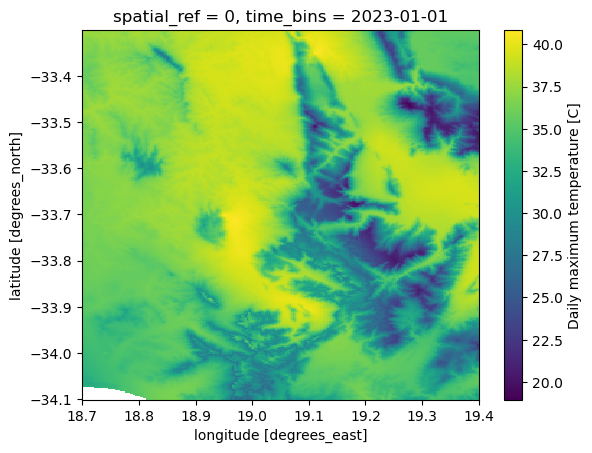

In [40]:
custom_input_ds.t_air_max_24.isel(time_bins=0).plot()

#### Running Custom ETLook

In [41]:
# Run et_look
custom_output_ds = pywapor.et_look.main(custom_input_ds)

> ET_LOOK
    --> Running `et_look` (v2).
    --> Calculating `declination`.
    --> Calculating `inverse_earth_sun_distance`.
    --> Calculating `vegetation_cover`.
    --> Calculating `leaf_area_index`.
    --> Calculating `effective_leaf_area_index`.
    --> Calculating `soil_fraction`.
    --> Calculating `latitude_rad`.
    --> Calculating `sunset_hour_angle`.
    --> Calculating `daily_solar_radiation_toa_flat`.
    --> Calculating `transmissivity`.
    --> Calculating `stress_radiation`.
    --> Calculating `air_pressure_kpa2mbar`.
    --> Calculating `air_pressure_daily`.
    --> Calculating `air_pressure`.
    --> Calculating `vapour_pressure_from_specific_humidity_daily`.
    --> Calculating `vapour_pressure_from_specific_humidity`.
    --> Calculating `saturated_vapour_pressure`.
    --> Calculating `vapour_pressure_deficit_daily`.
    --> Calculating `vapour_pressure_deficit`.
    --> Calculating `stress_vpd`.
    --> Calculating `stress_temperature`.
    --> Calculating `

In [42]:
custom_output_ds

<xarray.Dataset>
Dimensions:       (time_bins: 1, y: 314, x: 275)
Coordinates:
  * x             (x) float64 18.7 18.7 18.71 18.71 ... 19.39 19.39 19.4 19.4
  * y             (y) float64 -33.3 -33.3 -33.31 -33.31 ... -34.09 -34.1 -34.1
    spatial_ref   int64 ...
  * time_bins     (time_bins) datetime64[ns] 2023-01-01
Data variables:
    int_mm        (time_bins, y, x) float64 dask.array<chunksize=(1, 314, 275), meta=np.ndarray>
    t_24_mm       (time_bins, y, x) float64 dask.array<chunksize=(1, 314, 275), meta=np.ndarray>
    e_24_mm       (time_bins, y, x) float64 dask.array<chunksize=(1, 314, 275), meta=np.ndarray>
    et_24_mm      (time_bins, y, x) float64 dask.array<chunksize=(1, 314, 275), meta=np.ndarray>
    et_ref_24_mm  (time_bins, y, x) float64 dask.array<chunksize=(1, 314, 275), meta=np.ndarray>
    se_root       (time_bins, y, x) float64 dask.array<chunksize=(1, 314, 275), meta=np.ndarray>
    npp           (time_bins, y, x) float64 dask.array<chunksize=(1, 314, 275), meta=np.ndarray>

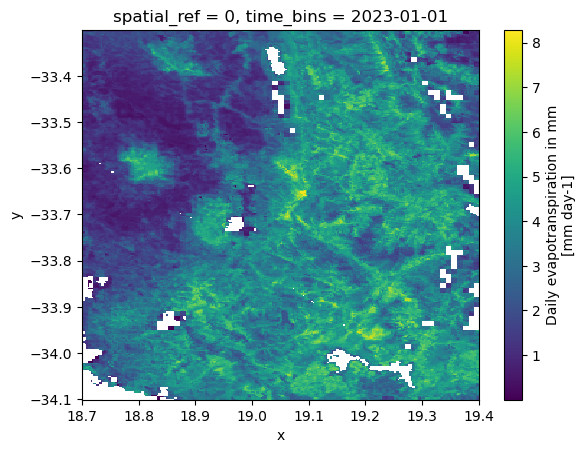

In [43]:
# Plot the daily evapotranspiration in mm
custom_output_ds.et_24_mm.isel(time_bins = 0).plot()

In [44]:
# Note these calculations loads the array into working memory
custom_et_data = custom_output_ds.et_24_mm.isel(time_bins = 0).values
print("resolution:", custom_et_data.shape)
print("total pixels:", custom_et_data.size)
print("number of pixels with missing data:", np.sum(np.isnan(custom_et_data)))
print("maximum value: {0:.2f}".format(np.nanmax(custom_et_data)))
print("minimum value: {0:.2f}".format(np.nanmin(custom_et_data)))
print("mean: {0:.2f}".format(np.nanmean(custom_et_data)))
print("median: {0:.2f}".format(np.nanmedian(custom_et_data)))

resolution: (314, 275)
total pixels: 86350
number of pixels with missing data: 2854
maximum value: 8.28
minimum value: 0.00
mean: 3.27
median: 3.42
